In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image
from utilities import calculate_psnr, calculate_rmse, calculate_ssim
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [3]:
# for model_path in model_paths:
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*"))
#     for fake in fakes:
        # im = Image.open(fake)
        # im1 = np.array(im)
        # print(im1)
        # im = im.convert('L')
        # im = np.array(im)

        # np.save(fake.replace(".png", ""), im)
        # os.system(f"rm {fake}")

# for model_path in model_paths:
#     key = os.path.basename(os.path.dirname(model_path))
#     fakes = np.sort(glob(os.path.dirname(model_path)+"/results/*.npy"))
#     rmse[key] = 0
#     for gt, fake, mask in zip(images, fakes, masks):
#         fake = np.load(fake)
#         gt = np.load(gt)
#         mask = np.load(mask)
#         rmse[key] += calculate_rmse(gt, fake, mask)/100

In [39]:
model_paths = np.sort(glob("checkpoint/model1/finetune/**/g_final.pth", recursive=True))
psnr = {}
ssim = {}
rmse = {}
for model_path in model_paths:
    # model_path = "checkpoint/model1/finetune/50000+25000/g_final.pth"
    print(model_path)
    key = os.path.basename(os.path.dirname(model_path))
    gts = np.sort(glob(os.path.dirname(model_path)+"/results/gt_*.npy"))
    fakes = np.sort(glob(os.path.dirname(model_path)+"/results/img_*.npy"))
    masks = np.sort(glob(os.path.dirname(model_path)+"/results/mask_*.npy"))
    # gts = np.sort(glob("results/results/gt_*.npy"))
    # fakes = np.sort(glob("results/results/img_*.npy"))
    # masks = np.sort(glob("results/results/mask_*.npy"))
    ssim[key] = 0
    psnr[key] = 0
    rmse[key] = 0
    counter = 0
    for gt, fake, mask in zip(gts, fakes, masks):
        fake = np.load(fake)
        gt = np.load(gt)
        mask = np.ma.make_mask(np.load(mask)[:, :, 0])
        ssim[key] += calculate_ssim(gt, fake, mask)/400
        psnr[key] += calculate_psnr(gt, fake, mask)/400
        rmse[key] += calculate_rmse(gt, fake, mask)/400
    #     plt.figure(figsize=(9,3), dpi=300)
    #     plt.subplot(1,3,1)
    #     plt.imshow(fake)
    #     plt.title("inpainted")
    #     print("min pixel value in inpaint: ", np.min(fake))
    #     print("max pixel value in inpaint: ", np.max(fake))
    #     plt.subplot(1,3,2)
    #     plt.imshow(gt)
    #     plt.title("ground truth")
    #     print("min pixel value in gt: ", np.min(gt))
    #     print("max pixel value in gt: ", np.max(gt))
    #     plt.subplot(1,3,3)
    #     plt.imshow((fake-gt))
    #     plt.colorbar()
    #     plt.title("diff")
    #     print("max pixel value in diff: ", np.max((fake-gt)))
    #     counter += 1
    #     if counter > 10:
    #         break
    # break

checkpoint/model1/finetune/1000+500/g_final.pth


checkpoint/model1/finetune/10000+5000/g_final.pth
checkpoint/model1/finetune/11000+5500/g_final.pth
checkpoint/model1/finetune/12000+6000/g_final.pth
checkpoint/model1/finetune/13000+6500/g_final.pth
checkpoint/model1/finetune/14000+7000/g_final.pth
checkpoint/model1/finetune/15000+7500/g_final.pth
checkpoint/model1/finetune/16000+8000/g_final.pth
checkpoint/model1/finetune/17000+8500/g_final.pth
checkpoint/model1/finetune/18000+9000/g_final.pth
checkpoint/model1/finetune/19000+9500/g_final.pth
checkpoint/model1/finetune/2000+1000/g_final.pth
checkpoint/model1/finetune/20000+10000/g_final.pth
checkpoint/model1/finetune/3000+1500/g_final.pth
checkpoint/model1/finetune/30000+15000/g_final.pth
checkpoint/model1/finetune/4000+2000/g_final.pth
checkpoint/model1/finetune/40000+20000/g_final.pth
checkpoint/model1/finetune/5000+2500/g_final.pth
checkpoint/model1/finetune/50000+25000/g_final.pth
checkpoint/model1/finetune/6000+3000/g_final.pth
checkpoint/model1/finetune/7000+3500/g_final.pth
ch

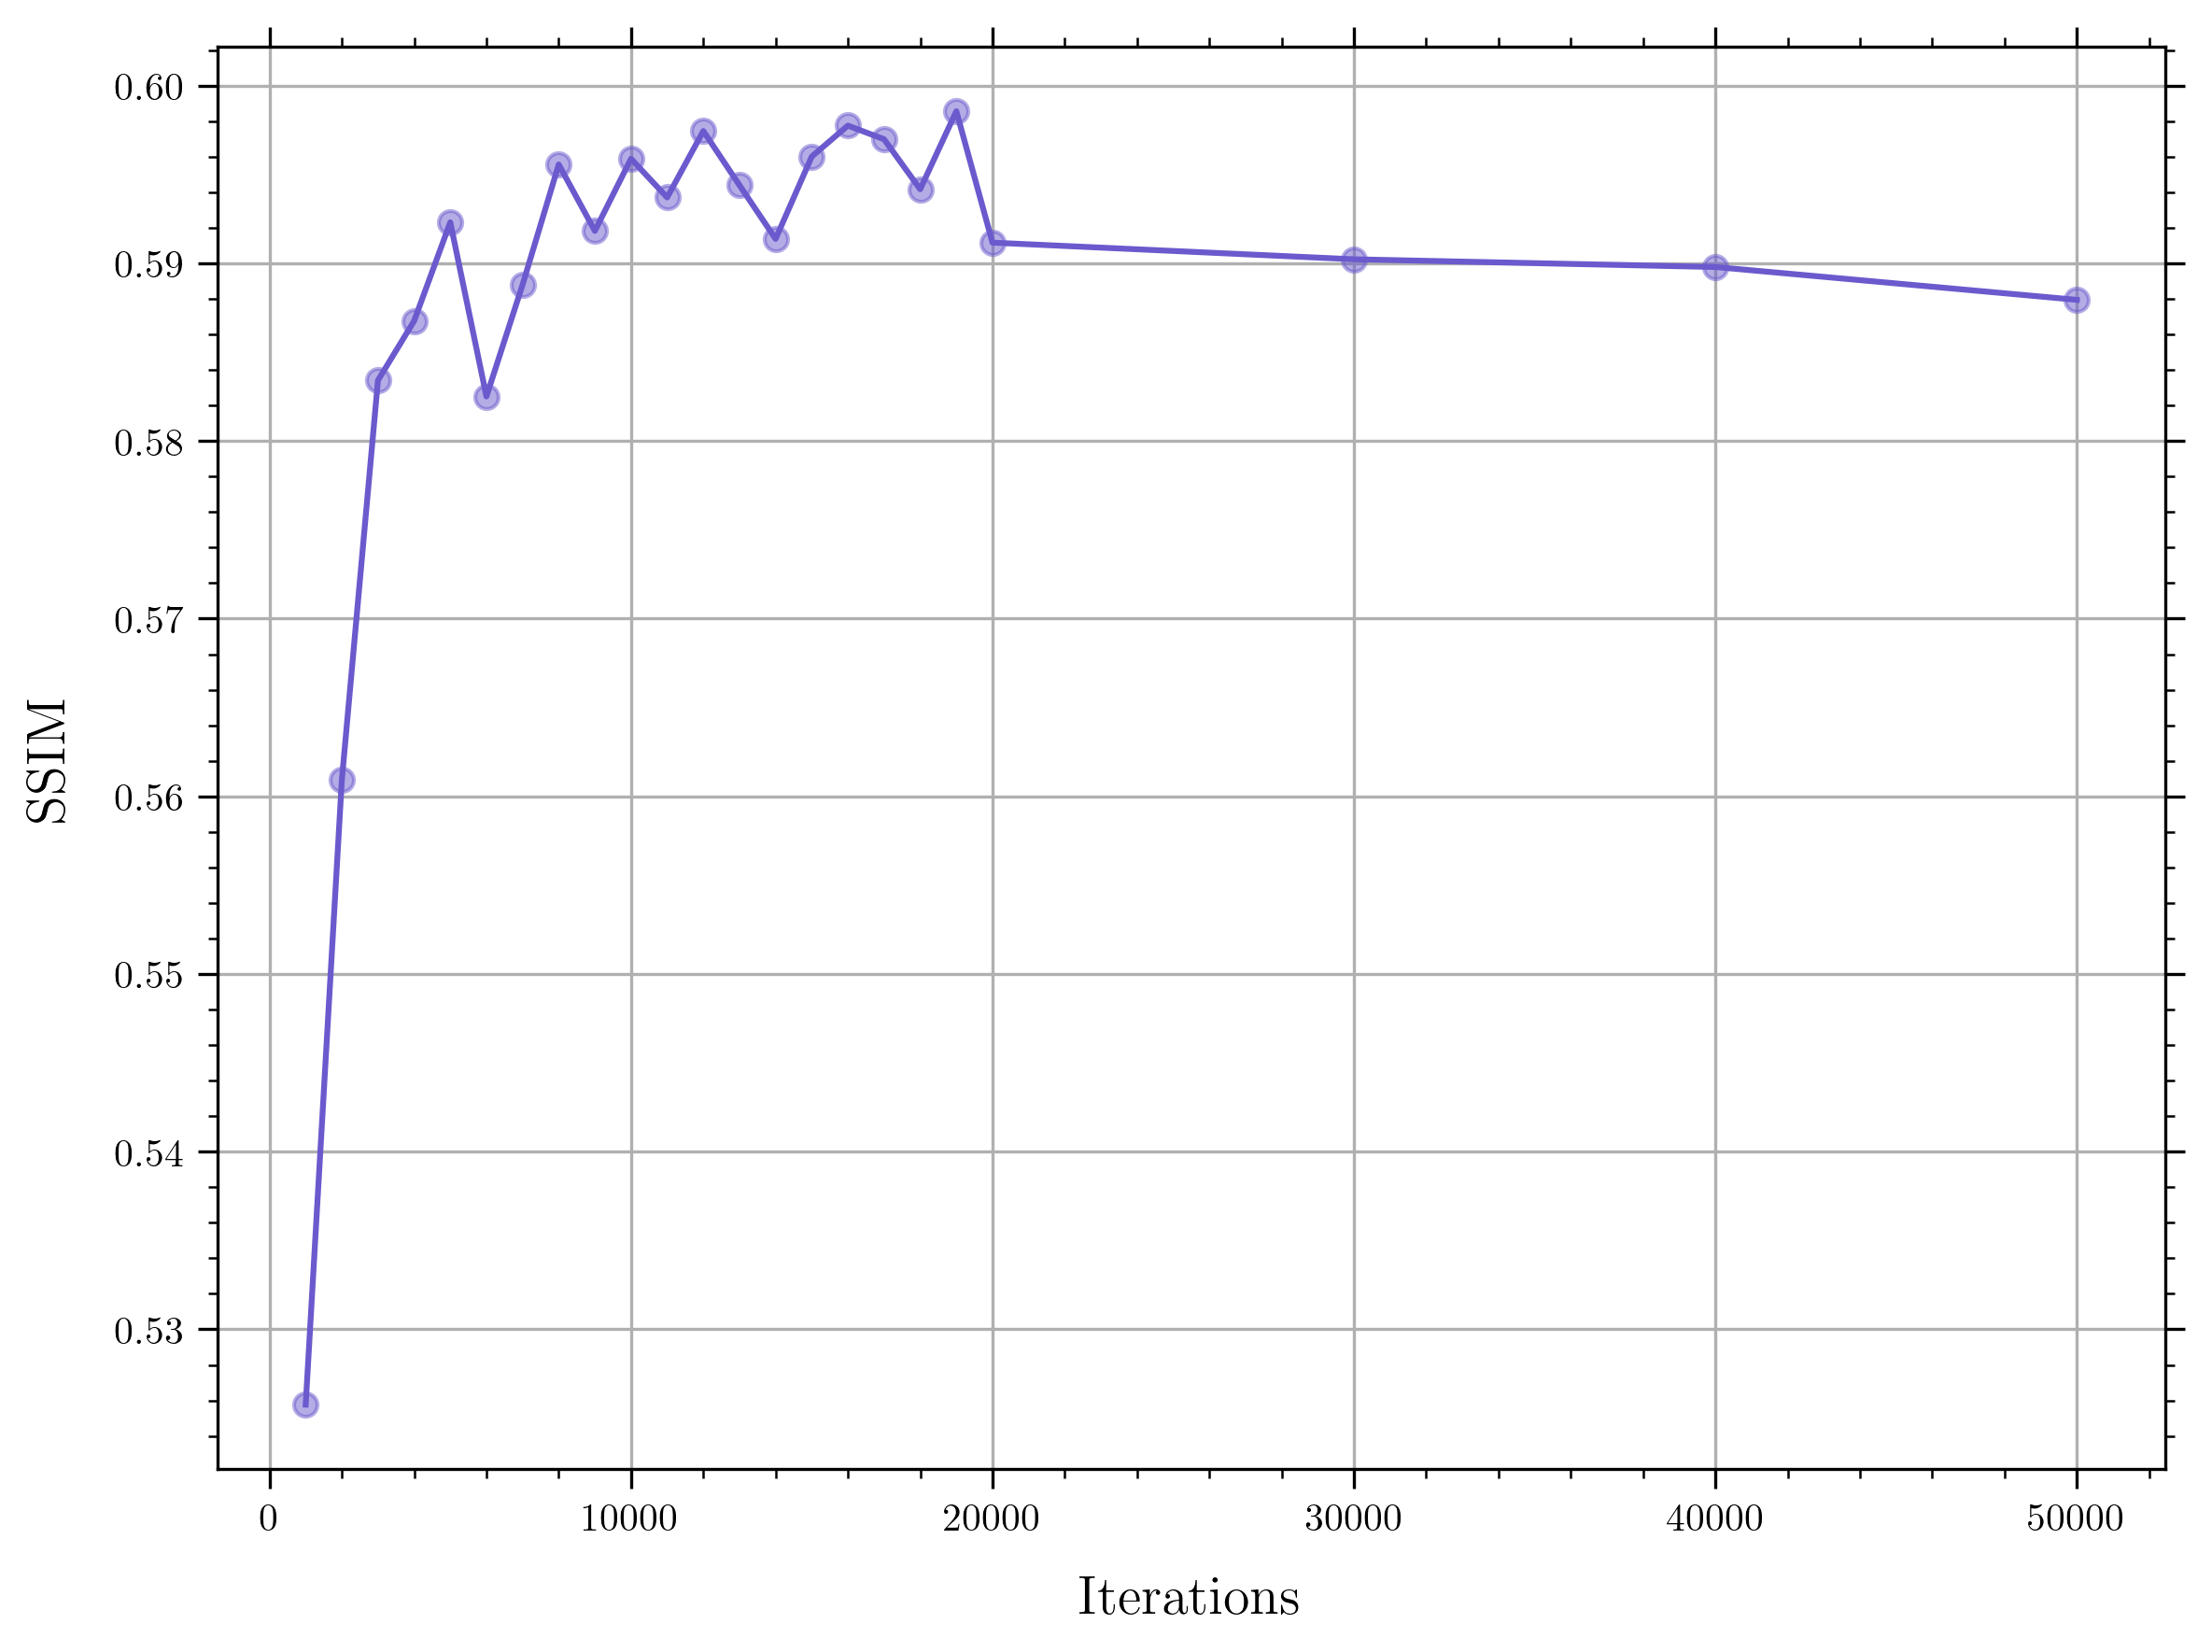

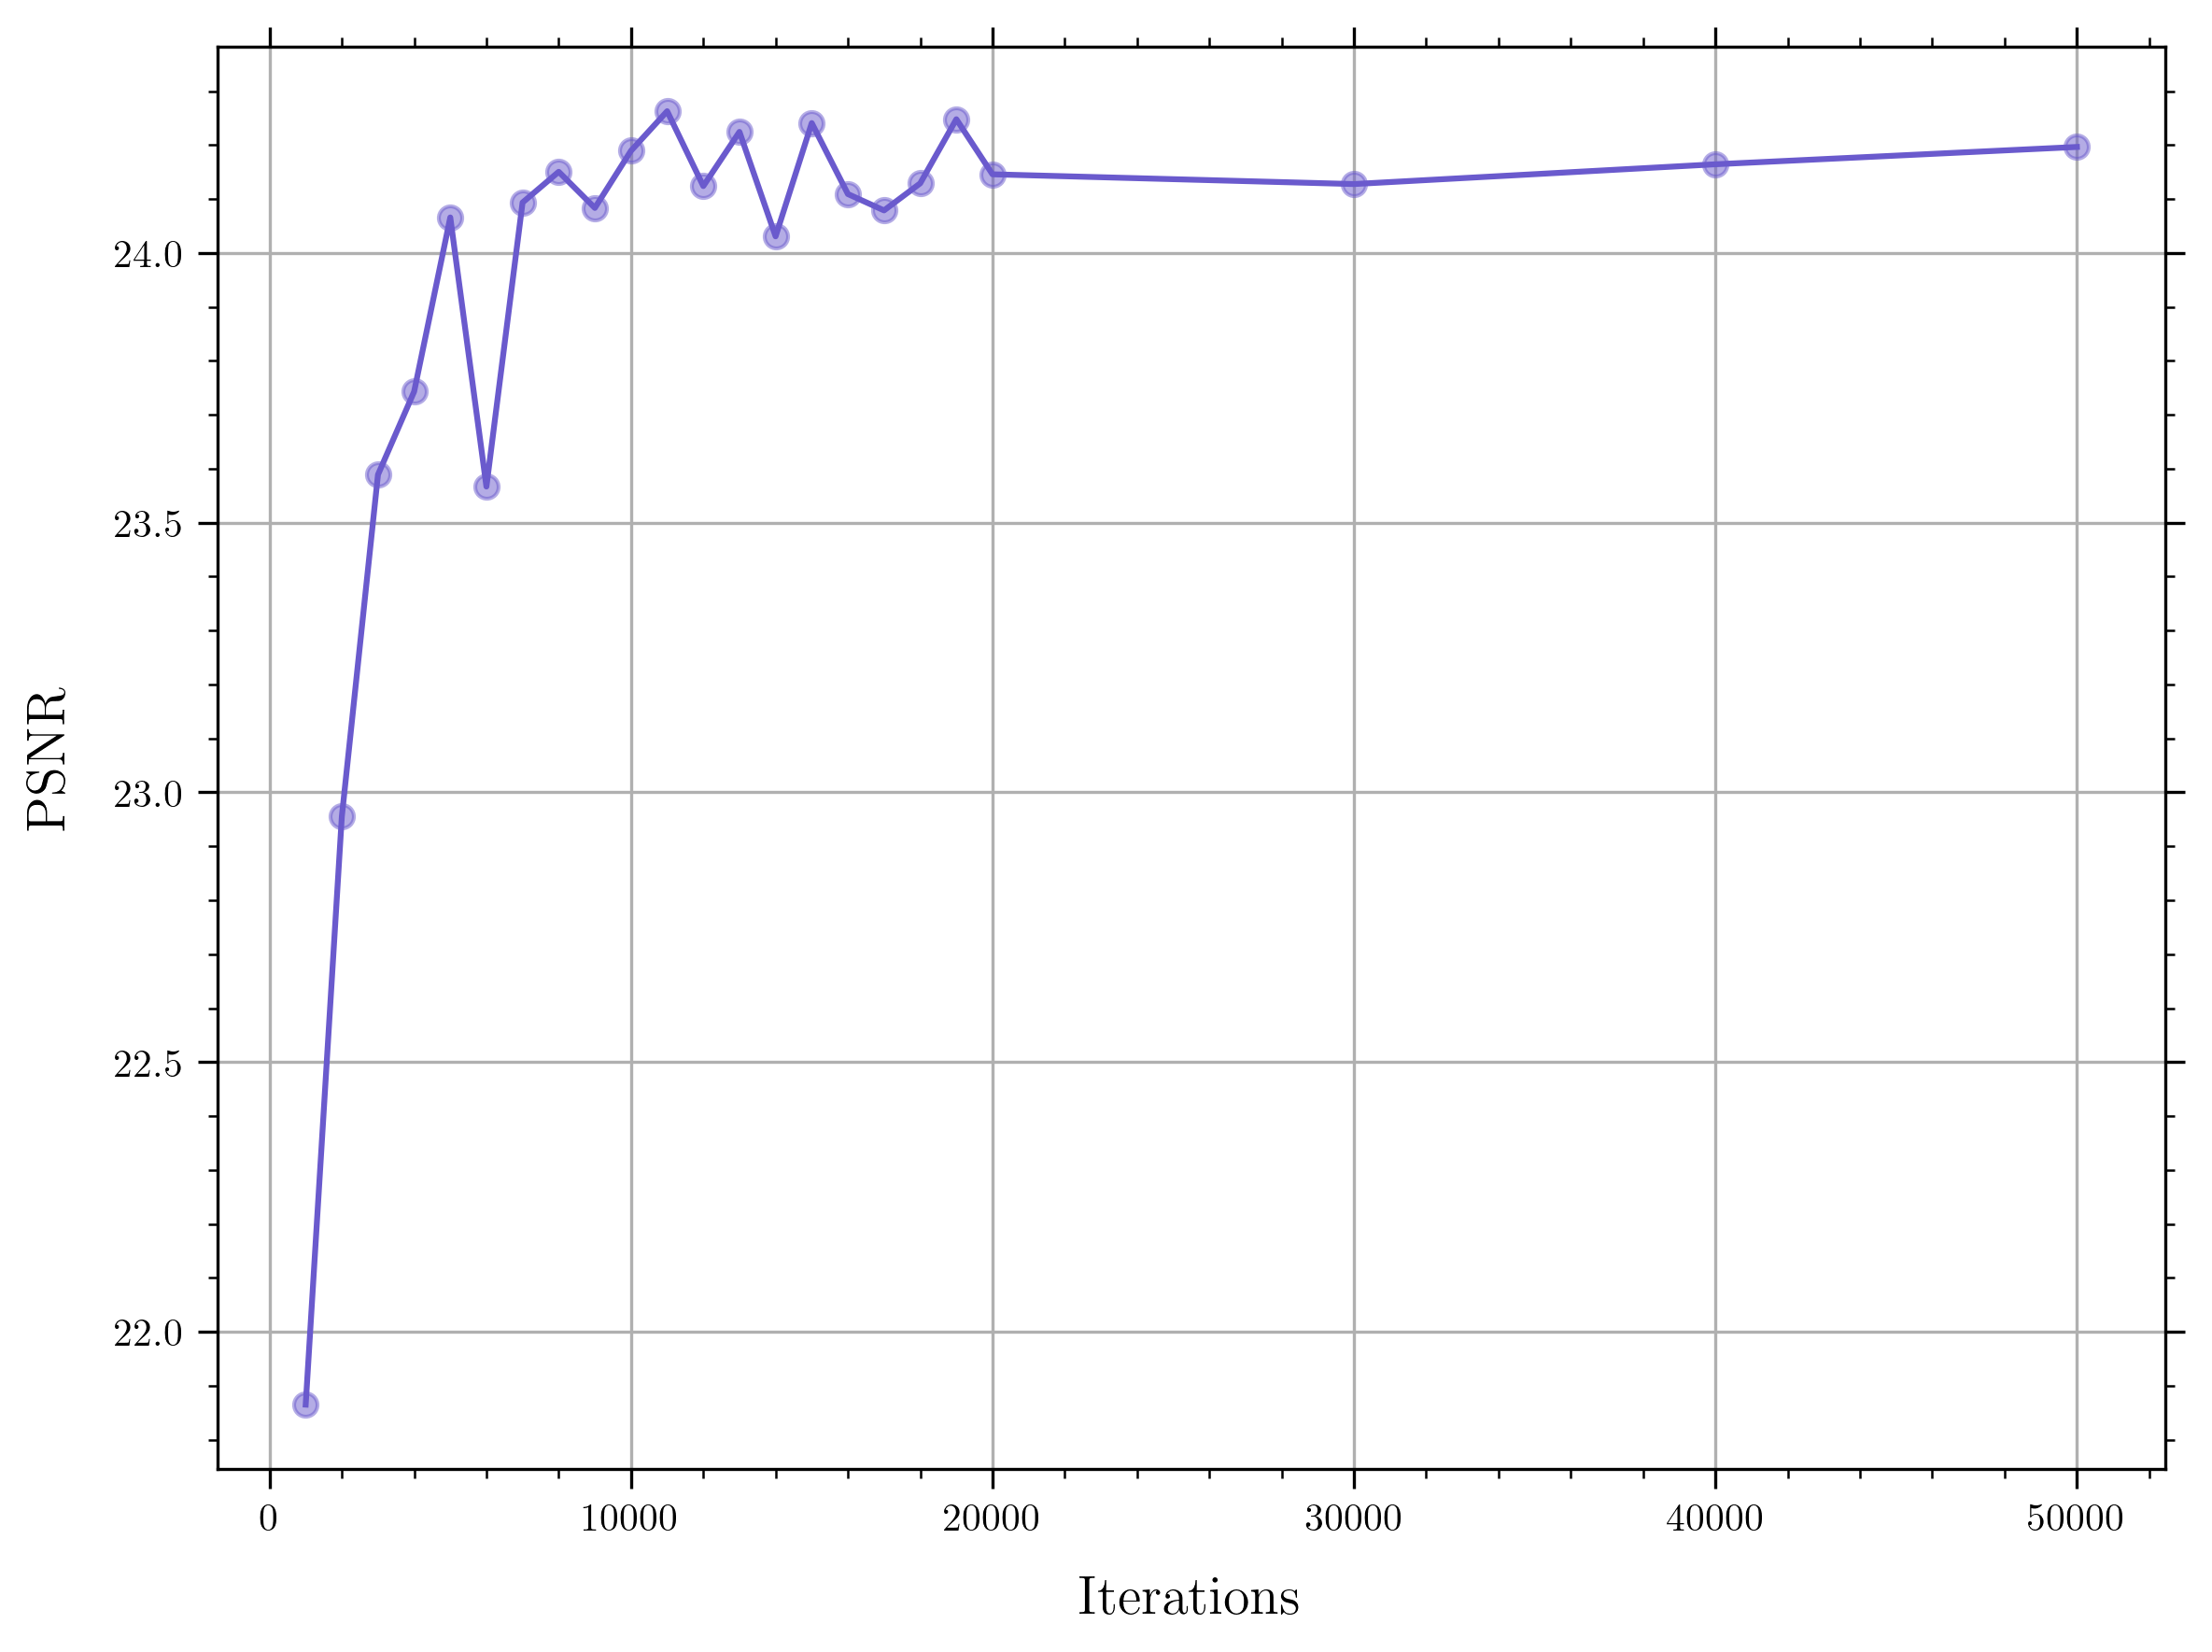

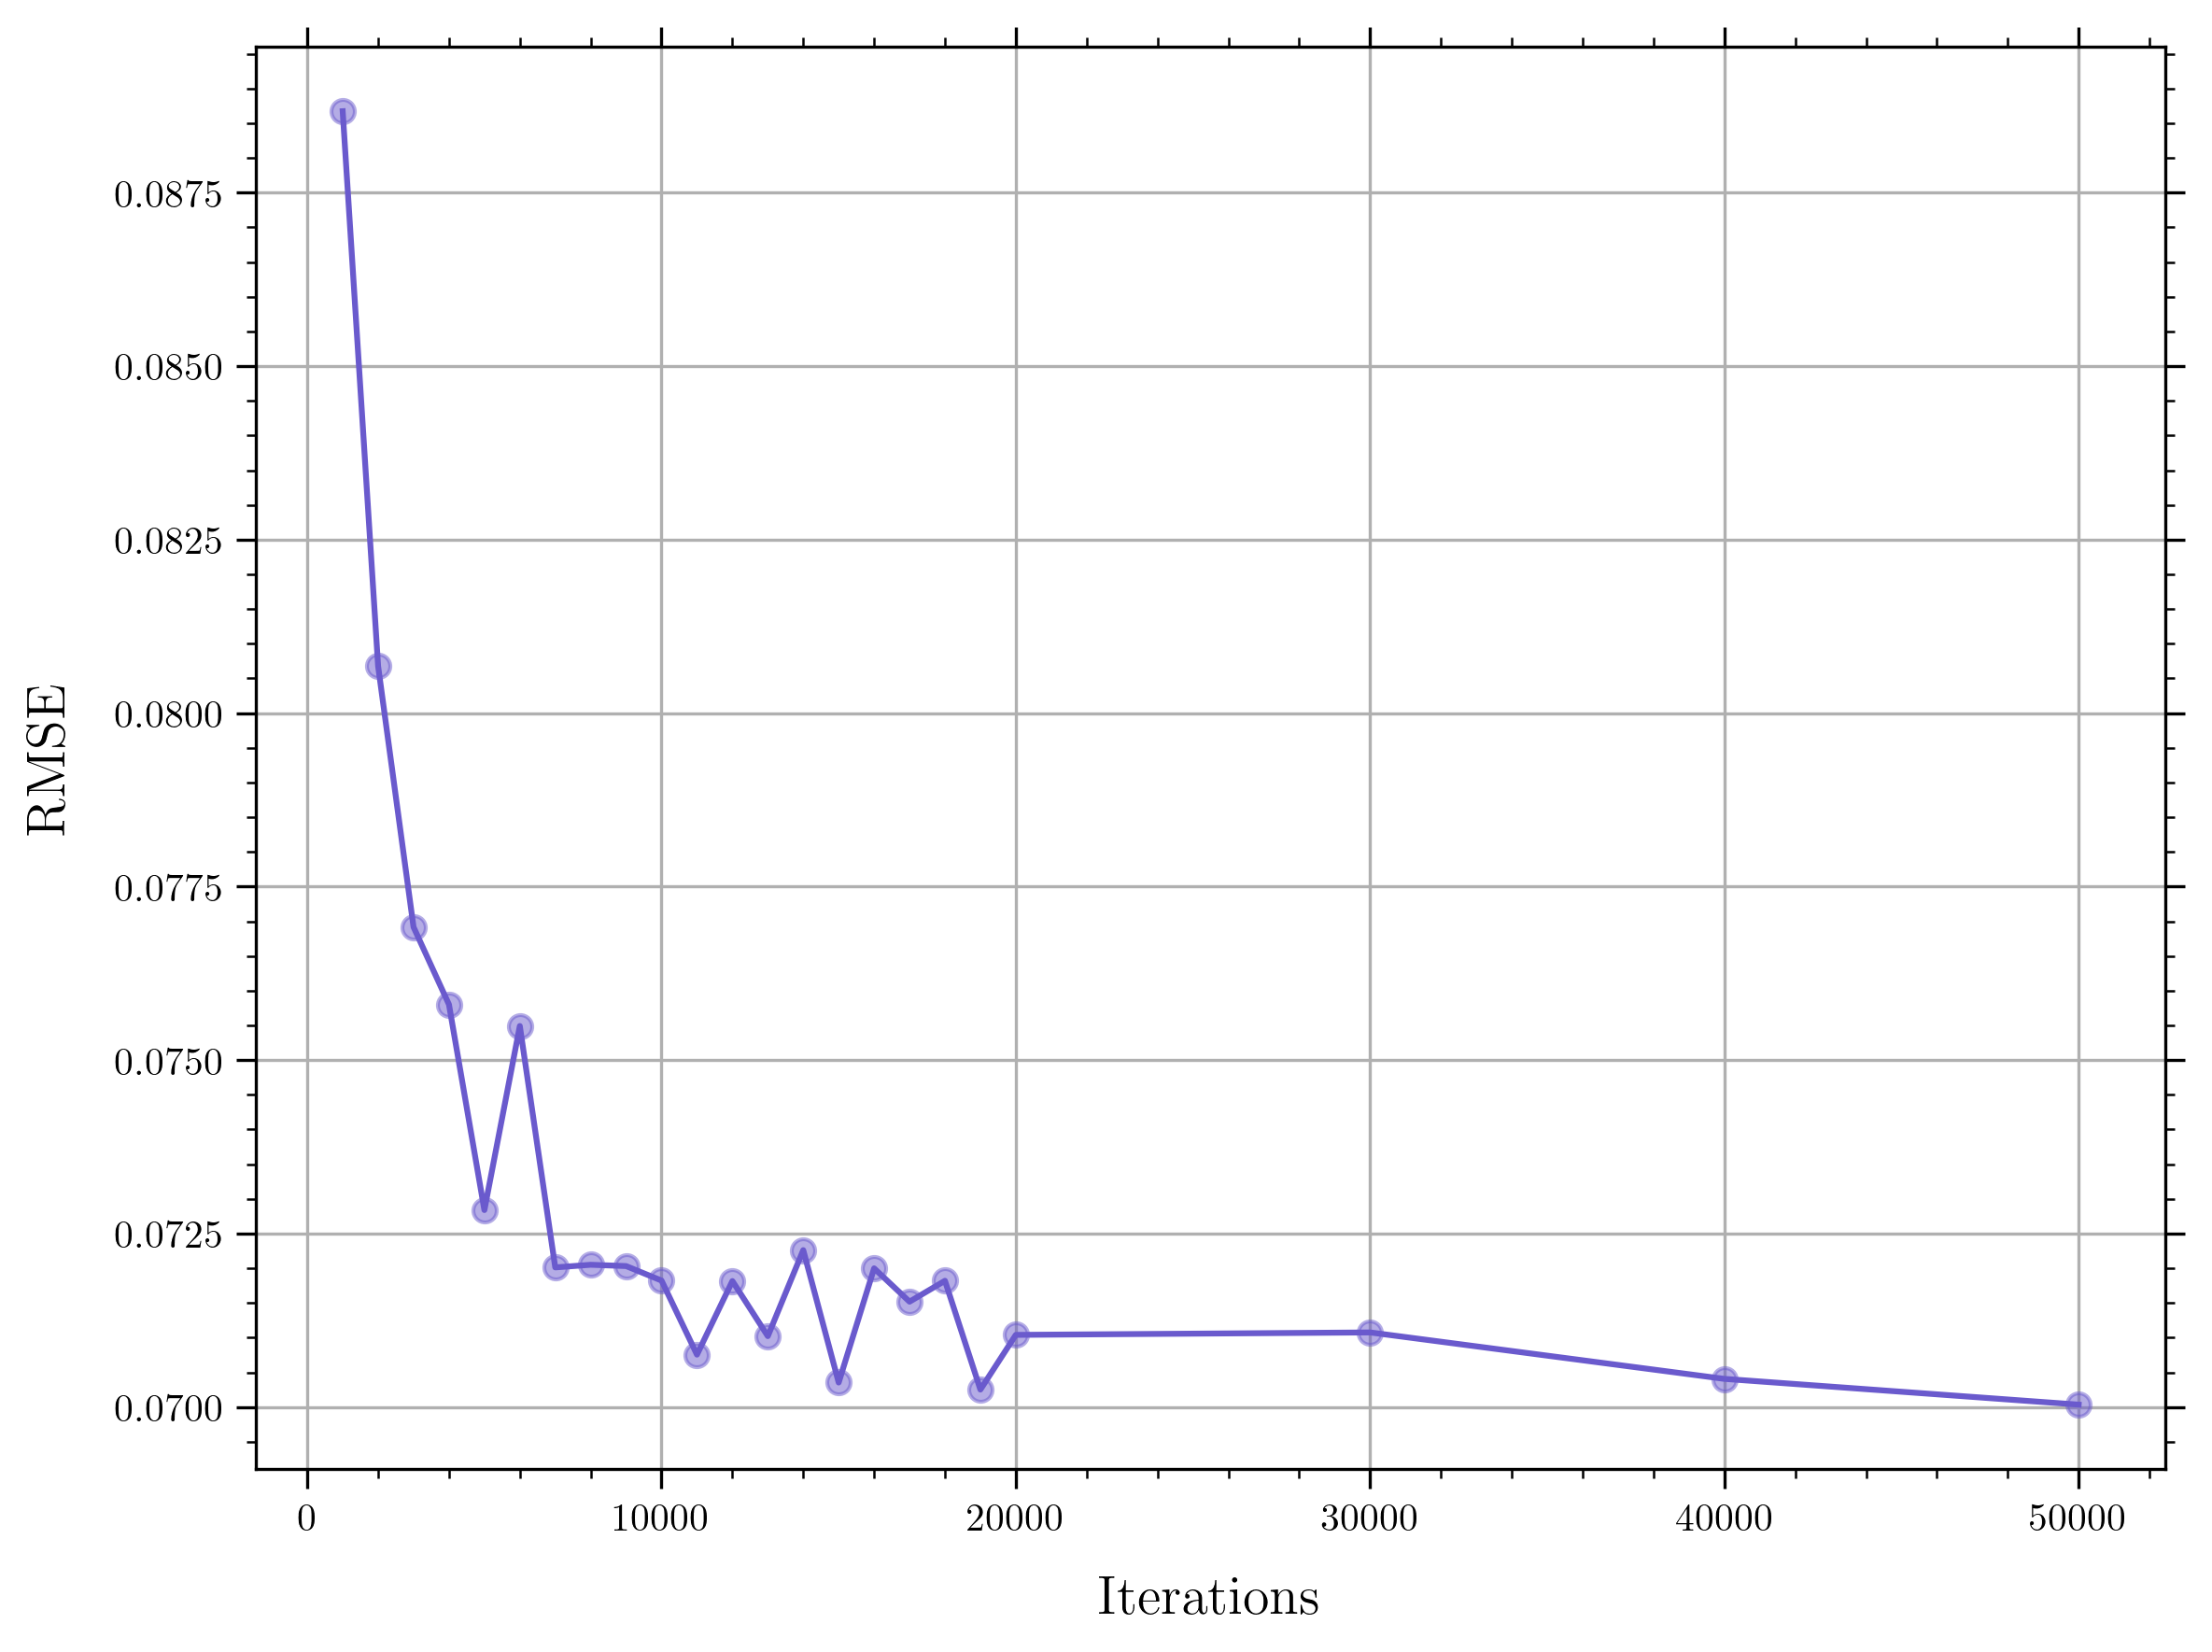

In [43]:
for metric, name in zip([ssim, psnr, rmse], ['SSIM', 'PSNR', 'RMSE']):
    x = np.array([int(x.split("+")[0]) for x in metric.keys()])
    sort = np.argsort(x)
    x = x[sort]
    y = np.array([float(y) for y in metric.values()])
    y = y[sort]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    ax.plot(x, y, color='slateblue')
    ax.scatter(x, y, color='slateblue', alpha=0.5)
    ax.set_ylabel(f"{name}", labelpad=10, fontsize=14)
    ax.set_xlabel(f"Iterations", labelpad=10, fontsize=14)
    ax.grid()
    fig.tight_layout()
    fig.savefig(f"checkpoint/model1/model1_{name}.png")